In [265]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.filters import threshold_otsu
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [266]:
digits = pd.read_csv("../datasets/optdigits/optdigits_train.csv", header=None)
digits_test = pd.read_csv("../datasets/optdigits/optdigits_test.csv.txt", header=None)
# Print the `digits` data 
# print(digits)
# print(digits_test)

In [267]:
import numpy as np
D= digits.as_matrix()
# X_train = np.array(D[:,:-1])
ylabelD = np.array(D[:,-1])
# print(X_train.shape,y_train.shape)
# X_train

In [268]:
Dtest = digits_test.as_matrix()
# X_test = np.array(Dtest[:,:-1])
ylabelT = np.array(Dtest[:,-1])

# print(X_test.shape, y_test.shape)
# print(X_train.shape[0] + X_test.shape[0])
# X_test

In [269]:
Lindex = []
for i in xrange(0,11):
    l = np.where(ylabelD==i)
    Lindex.append(l)   

In [341]:
# learn a 3-class classifier for optical character recognition 
# for any three digits between 0 and 9.

X1 = D[Lindex[1]]
X4 = D[Lindex[4]]
X7 = D[Lindex[7]]

#cancatinating the three classes
X_new = np.vstack([X1,X4,X7])

# Splitting the data into Xtrain and ytrain)(lables)
X_train = np.array(X_new[:,:-1])
y_train = np.array(X_new[:,-1])

n_inputs = len(X_train)
n_outputs = len(np.unique(y_train))

print(X_train.shape)

print("No. of input units for the network from training set : {}".format(n_inputs))
print("No. of output units for the network from training set : {}".format(n_outputs))

(1163, 64)
No. of input units for the network from training set : 1163
No. of output units for the network from training set : 3


In [271]:
y_train

array([1, 1, 1, ..., 7, 7, 7])

In [272]:
L = preprocessing.LabelEncoder()
y_trainL = L.fit_transform(y_train)
y_trainL
ytrain_OH= np.zeros((len(X_train),len(np.unique(y_train))))
for i in range(y_trainL.shape[0]):
    ytrain_OH[i, y_trainL[i]] = 1
    
y_trainL    

array([0, 0, 0, ..., 2, 2, 2])

In [273]:
LindexT = []
for i in xrange(0,11):
    l = np.where(ylabelT==i)
    LindexT.append(l)   

In [342]:
Xtest1 = Dtest[LindexT[1]]
Xtest4 = Dtest[LindexT[4]]
Xtest7 = Dtest[LindexT[7]]

#cancatinating the three classes
Xtest_new = np.vstack([Xtest1,Xtest4,Xtest7])

# Splitting the data into Xtrain and ytrain)(lables)
X_test = np.array(Xtest_new[:,:-1])
y_test = np.array(Xtest_new[:,-1])

testlen = len(X_test)
labellen = len(np.unique(y_test))

print("No. of input units for the network from testing set: {}".format(testlen))
print("No. of output units for the network  from testing set: {}".format(labellen))

No. of input units for the network from testing set: 542
No. of output units for the network  from testing set: 3


In [343]:
# Label encoding and transforming to one hot form
L1 = preprocessing.LabelEncoder()
y_testL = L1.fit_transform(y_test)
ytest_OH= np.zeros((len(X_test),len(np.unique(y_test))))
for i in range(y_testL.shape[0]):
    ytest_OH[i, y_testL[i]] = 1
    
ytest_OH

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.]])

In [344]:
# The implementation for the Multi-layer Neural Network from scratch

def sigmoid(x):
    return 1/(1 + np.exp(-x))
class MLP(object):
    def __init__(self, X_train,y_train,nH):
        self.X_train = X_train
        self.y_train = y_train
        
        L = preprocessing.LabelEncoder()
        self.y_trainL = L.fit_transform(self.y_train)
        self.ytrain_OH= np.zeros((len(self.X_train),len(np.unique(self.y_train))))
        for i in range(self.y_trainL.shape[0]):
            self.ytrain_OH[i, y_trainL[i]] = 1

        self.n_inputs = self.X_train.shape[1]
        self.n_outputs = len(np.unique(y_train))
        
        self.weights1 = np.random.randn(self.n_inputs, nH)/float(np.sqrt(self.n_inputs))
        self.b1 = np.zeros((nH))
        self.weights2 = np.random.randn(nH, n_outputs)/float(np.sqrt(nH))
        self.b2 = np.zeros((n_outputs))  

    def predict(self):
        # Forward Pass
        predictions = []
        for x in range(self.X_train.shape[0]):
            a_1 = sigmoid(np.matmul((self.weights1).T, self.X_train[x,:])[:,np.newaxis]+self.b1[:,np.newaxis])  
            a_2 = sigmoid(np.matmul(self.weights2.T, a_1)+self.b2[:, np.newaxis])
            predictions.append(np.argmax(a_2, axis = 0))
        predictions =  np.vstack(predictions)[:,0] 
        accuracy = np.sum(predictions == self.y_trainL)/float(np.shape(self.y_trainL)[0])
        print('acc: {:.4f}'.format( accuracy))
#         return a_2
    
    def testpredict(self,X_test, y_test):
        # Forward Pass
        print("testpredict()")
        L1 = preprocessing.LabelEncoder()
        y_testL = L1.fit_transform(y_test)
        predictions = []
        for x in range(X_test.shape[0]):
            a_1 = sigmoid(np.matmul((self.weights1).T, X_test[x,:])[:,np.newaxis]+self.b1[:,np.newaxis])  
            a_2 = sigmoid(np.matmul(self.weights2.T, a_1)+self.b2[:, np.newaxis])
            predictions.append(np.argmax(a_2, axis = 0))
        predictions =  np.vstack(predictions)[:,0] 
        accuracy = np.sum(predictions == y_testL)/float(np.shape(y_testL)[0])
        print("acc: {:.4f}".format(accuracy))
#         return a_2
        

    def train(self, max_epochs=10, lr_rate=0.01):

        for i in range(max_epochs):
            num_samples = self.X_train.shape[0]
            shuffled_indices = random.sample(range(num_samples), num_samples)

            for x in shuffled_indices:
                 # Forward Pass
                a_1 = sigmoid(np.matmul((self.weights1).T, self.X_train[x])[:,np.newaxis]+self.b1[:,np.newaxis])  

                a_2 = sigmoid(np.matmul(self.weights2.T, a_1)+self.b2[:, np.newaxis])
                
                # Backpropagation
                delta_2 = (a_2 - self.ytrain_OH[x][:, np.newaxis] )*(a_2*(1-a_2))
                dE_dw_2 = np.matmul(a_1, delta_2.T)
                dE_db_2 = (delta_2)
                delta_1 = (a_1*(1-a_1))*np.matmul(self.weights2, delta_2)
                dE_dw_1 = np.matmul(self.X_train[x][:,np.newaxis], delta_1.T)             
                dE_db_1 = (delta_1)
                self.weights1 = self.weights1 - lr_rate*dE_dw_1
                self.b1 = self.b1 - lr_rate*dE_db_1[:,0]    
                self.weights2 = self.weights2 - lr_rate*dE_dw_2
                self.b2 = self.b2 - lr_rate*dE_db_2[:,0]
            accuracy = self.predict()

In [357]:
mlp5 = MLP(X_train,y_train,5)
print("="*30)
print("Training with 5 hidden units")
print("accuracy")
print("="*30)
mlp5.train(lr_rate=0.1)
print("="*30)
print("Prediction accuracy on test data: ")
mlp5.testpredict(X_test,y_test)
print("="*30)

Training with 5 hidden units
accuracy
acc: 0.9226
acc: 0.9708
acc: 0.9647
acc: 0.9897
acc: 0.9854
acc: 0.9725
acc: 0.9854
acc: 0.6518
acc: 0.9862
acc: 0.8899
Prediction accuracy on test data: 
testpredict()
acc: 0.9077


### learning rate effect 
while using learning rate as 1, the network became so agressive, and could only predict around 50%

In [358]:
mlp25 = MLP(X_train,y_train,25)
print("="*30)
print("Training with 25 hidden units")
print("accuracy")
print("="*30)
mlp25.train(lr_rate=1)
print("="*30)
print("Prediction accuracy on test data: ")
mlp25.testpredict(X_test,y_test)
print("="*30)

Training with 25 hidden units
accuracy
acc: 0.3328
acc: 0.5924
acc: 0.4987


/home/shravankumar/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in exp


acc: 0.5967
acc: 0.6113
acc: 0.5159
acc: 0.5709
acc: 0.5787
acc: 0.5572
acc: 0.5804
Prediction accuracy on test data: 
testpredict()
acc: 0.5941


In [359]:
mlp125 = MLP(X_train,y_train,125)
print("="*30)
print("Training with 125 hidden units")
print("accuracy")
print("="*30)
mlp125.train()
print("="*30)
print("Prediction accuracy on test data: ")
mlp125.testpredict(X_test,y_test)
print("="*30)

Training with 125 hidden units
accuracy
acc: 0.9785
acc: 0.9871
acc: 0.9940
acc: 0.9966
acc: 0.9983
acc: 0.9991
acc: 0.9991
acc: 0.9991
acc: 0.9991
acc: 0.9991
Prediction accuracy on test data: 
testpredict()
acc: 0.9871


In [347]:
mlp225 = MLP(X_train,y_train,225)
print("="*30)
print("Training with 25 hidden units")
print("accuracy")
print("="*30)
mlp225.train()
print("="*30)
print("Prediction accuracy on test data: ")
mlp225.testpredict(X_test,y_test)
print("="*30)

Training with 25 hidden units
accuracy
acc: 0.9819
acc: 0.9888
acc: 0.9914
acc: 0.9957
acc: 0.9966
acc: 0.9957
acc: 0.9983
acc: 0.9974
acc: 0.9991
acc: 0.9991
Prediction accuracy on test data: 
testpredict()
acc: 0.9852


In [348]:
mlp225 = MLP(X_train,y_train,150)
print("="*30)
print("Training with 25 hidden units")
print("accuracy")
print("="*30)
mlp225.train()
print("="*30)
print("Prediction accuracy on test data: ")
mlp225.testpredict(X_test,y_test)
print("="*30)

Training with 25 hidden units
accuracy
acc: 0.9854
acc: 0.9871
acc: 0.9940
acc: 0.9974
acc: 0.9983
acc: 0.9983
acc: 0.9983
acc: 0.9983
acc: 0.9983
acc: 0.9983
Prediction accuracy on test data: 
testpredict()
acc: 0.9908


In [349]:
images = []
size = (8,8)
for x in X_train:
    I = np.resize(x,size)
    images.append(I)

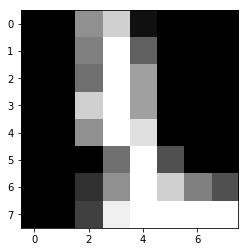

In [350]:
imgs = np.array(images)
plt.imshow(imgs[1],cmap='gray')
I1 = imgs[1]
plt.savefig("../Submission/Documentation/images/P1/GrayImage.png")

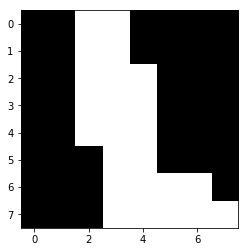

In [351]:
thresh = threshold_otsu(I1)
binary = I1 > thresh
plt.imshow(binary,cmap='gray')
plt.savefig("../Submission/Documentation/images/P1/Digitized_Sample_Image.png")

In [360]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(200,), max_iter=1000, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.01)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 4.35570298
Iteration 2, loss = 0.22492907
Iteration 3, loss = 0.07938539
Iteration 4, loss = 0.04339715
Iteration 5, loss = 0.02301367
Iteration 6, loss = 0.01639213
Iteration 7, loss = 0.00819133
Iteration 8, loss = 0.00763719
Iteration 9, loss = 0.00479471
Iteration 10, loss = 0.00308399
Iteration 11, loss = 0.00224659
Iteration 12, loss = 0.00195858
Iteration 13, loss = 0.00155027
Iteration 14, loss = 0.00141848
Iteration 15, loss = 0.00124737
Iteration 16, loss = 0.00116831
Iteration 17, loss = 0.00104896
Iteration 18, loss = 0.00099918
Iteration 19, loss = 0.00092711
Iteration 20, loss = 0.00088214
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Training set score: 1.000000
Test set score: 0.990775
